## Sampling

In [13]:
import pandas as pd
import numpy as np
from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [14]:
# ! pip install datascience 

In [15]:
top_movie = pd.read_csv('top_movies_2017.csv')
top_movie.set_index(np.arange(len(top_movie)), inplace=True) 
top_movie.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
1,Star Wars,Fox,460998007,1583483200,1977
2,The Sound of Music,Fox,158671368,1266072700,1965
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
4,Titanic,Paramount,658672302,1204368000,1997


### Deterministic sampling

In [16]:
# take sample by index
top_movie.take([3, 5, 7])

,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
5,The Ten Commandments,Paramount,65500000,1164590000,1956
7,Doctor Zhivago,MGM,111721910,1103564200,1965


In [17]:
# get movies that contains 'and the' in their Title
# top_movie.where(top_movie.Title.str.contains('and the'),other='')
top_movie[top_movie['Title'].str.contains('and the')]

,Title,Studio,Gross,Gross (Adjusted),Year
9,Snow White and the Seven Dwarves,Disney,184925486,969010000,1937
35,Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,1969
70,Smokey and the Bandit,Universal,126737428,505244700,1977
71,Beauty and the Beast (2017),Buena Vista,504014165,504014165,2017
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,317575550,497066400,2001
75,Lady and the Tramp,Disney,93602326,495483100,1955
91,Indiana Jones and the Temple of Doom,Paramount,179870271,475906700,1984
105,Indiana Jones and the Last Crusade,Paramount,197171806,439312600,1989
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,381011219,426630300,2011
129,Beauty and the Beast,Buena Vista,218967620,403283400,1991


### Probability sampling

In [18]:
# Sampling by picking random satarting point
# the prob of each sample end up in the list is 1 in 10
start = np.random.choice(np.arange(10))    
top_movie.take(np.arange(start, start+5)) 
    

,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,658672302,1204368000,1997
5,The Ten Commandments,Paramount,65500000,1164590000,1956
6,Jaws,Universal,260000000,1138620700,1975
7,Doctor Zhivago,MGM,111721910,1103564200,1965
8,The Exorcist,Warner Brothers,232906145,983226600,1973


In [19]:
# Taking a uniform random sample.
top_movie.sample(5)   # each row has equal chance

,Title,Studio,Gross,Gross (Adjusted),Year
154,Harry Potter and the Order of the Phoenix,Warner Brothers,292004738,377314200,2007
174,Austin Powers: The Spy Who Shagged Me,Newline,206040086,360570200,1999
96,Toy Story 3,Buena Vista,415004880,464074600,2010
100,The Hunger Games,Lionsgate,408010692,452174400,2012
139,Indiana Jones and the Kingdom of the Crystal S...,Paramount,317101119,392622400,2008


In [20]:
# by defual sample use sampling withot  replacement
top_movie.sample(10).groupby('Title').count()

,Studio,Gross,Gross (Adjusted),Year
Title,,,,
Batman Forever,1,1,1,1
Doctor Zhivago,1,1,1,1
Gremlins,1,1,1,1
Harry Potter and the Half-Blood Prince,1,1,1,1
Liar Liar,1,1,1,1
Return of the Jedi,1,1,1,1
Star Wars,1,1,1,1
The Fugitive,1,1,1,1
The Incredibles,1,1,1,1


In [21]:
# sampling with replacement 
# sample could be repeated
top_movie.sample(10, replace=True).groupby('Title').count()

,Studio,Gross,Gross (Adjusted),Year
Title,,,,
Funny Girl,1,1,1,1
Jurassic World,1,1,1,1
Lawrence of Arabia,1,1,1,1
Pinocchio,1,1,1,1
Spider-Man 2,1,1,1,1
The Secret Life of Pets,1,1,1,1
The Sound of Music,1,1,1,1
The Sting,1,1,1,1
The Twilight Saga: New Moon,1,1,1,1


### Distributions

#### Dice

Shows distribution of chances

In [22]:
die = pd.DataFrame(np.arange(6)+1, columns=['face'])
die

,face
0,1
1,2
2,3
3,4
4,5
5,6


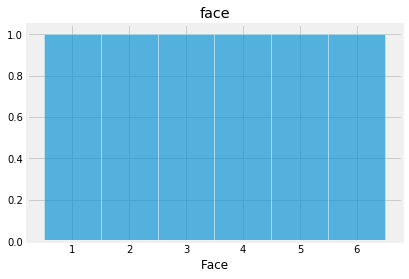

In [23]:
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), edgecolor='white',alpha=0.65)
    plots.xlabel('Face')
face_hist(die)

### Emperical 
An emperical dist is based on observations-- repetitions of an experiment. it describes
    - All observed values, or 
    - Proportion of times each value appears


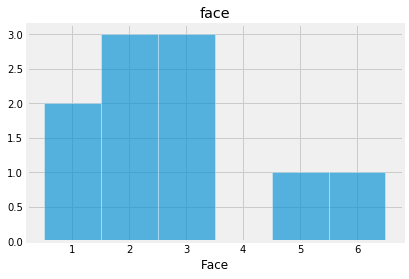

In [24]:
# sample size of 1000 to larger and smaller numbers
face_hist(die.sample(10, replace=True))

### Large random sample

Law of Averages: If an experiment is repeated many time, the mean regress to the theoretical vale


In [25]:
# One year flight data from United
united = pd.read_csv('united.csv')
united.head()

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64


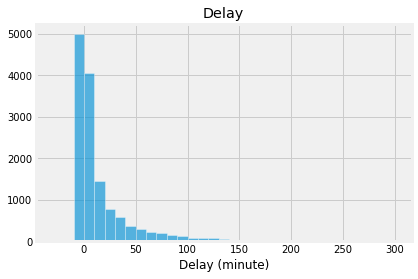

In [26]:
def delay_hist(t):
    t.hist('Delay',bins=np.arange(-30, 301, 10), edgecolor='white',alpha=0.65)
    plots.xlabel('Delay (minute)')
delay_hist(united)

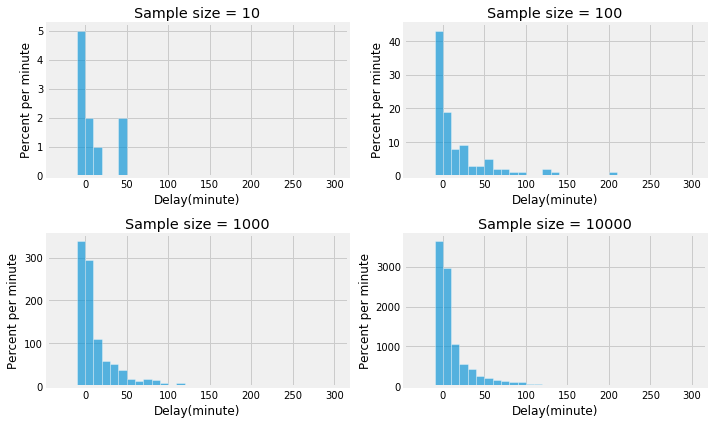

In [27]:
# increase sample size
f,a = plots.subplots(2,2, figsize=(10,6),squeeze=True)
n = [10,100,1000,10000]
a = a.ravel()
for idx,ax in enumerate(a):  
#     print(n[idx])
    ax.hist(united.Delay.sample(n[idx]), bins=np.arange(-30, 301, 10), 
            edgecolor='white',alpha=0.65)
    ax.set_title('Sample size = {}'.format(n[idx]))
    ax.set_xlabel('Delay(minute)')
    ax.set_ylabel('Percent per minute')   
plots.tight_layout()   


### Simulation

Rolling dice: What is the probability of getting `6` in `4` rolls of a die

In [28]:
# Probability of getting a 6
dice = np.arange(6)+1
# number of dice
k = 4
print("Prob of getting 6 in 4 rolls of dice {}".format(1-5/6**4))

Prob of getting 6 in 4 rolls of dice 0.996141975308642


In [29]:
# simulation
trails = 10000
successes = 0

for _ in np.arange(trails):
    rolls = np.random.choice(dice, k)
    if sum(rolls ==6) > 0:    # when rolls is 6 count will be 1
        successes = successes + 1
# chance of getting 6: outcome over number of traials
successes/trails
        

0.5287

### Statistical Inference

- making conclusion based on data in random samples

In [30]:
# simulation
def estimate_by_simulation(trials):
#     trails = 10000
    successes = 0

    for _ in np.arange(trails):
        rolls = np.random.choice(dice, k)
        if sum(rolls ==6) > 0:    # when rolls is 6 count will be 1
            successes = successes + 1
    # chance of getting 6: outcome over number of traials
    return successes/trails

# create many estimate to learn about the population
# roll 10,000 dice and create 10,000 estimates
estimates = []
for _ in np.arange(10000):
    estimates.append(estimate_by_simulation(10000))

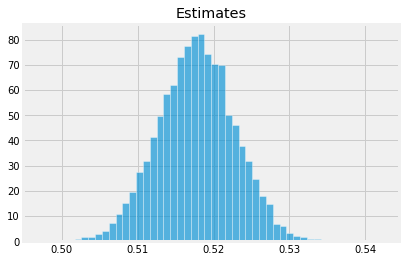

In [31]:
# Create histogram of estimates
# Empirical distribution of statistics by simulation
pd.DataFrame(estimates, columns=['Estimates']).hist(bins=50,edgecolor='white', 
                                                    alpha=0.65,normed=True)
plots.show()

### Comparing Distributions

Section 197 of California's Code of Civil Proceure says,
"All persons selected for juty service shall be selected at random, from a source or sources inclusive of a representative cross section of the population of the are served by the court"

Question: Could the distribution of jury panel selection, shown below, in California happed due to chance?

In [32]:
dics_1 = {"Ethncity":['Asian', 'Black', 'Latino', 'White', 'Other'],
     "Eligible":np.array((0.15, 0.18, 0.12, 0.54, 0.01)),
      "Panels":np.array((0.26, 0.08, 0.08, 0.54, 0.04))}

jury = pd.DataFrame.from_dict(dics_1)
jury = jury[['Ethncity', 'Eligible', 'Panels']]
jury

,Ethncity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


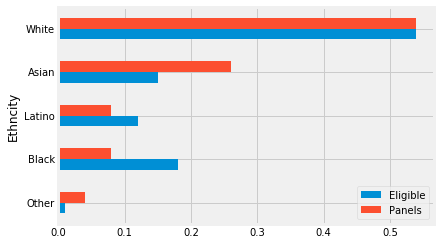

In [33]:
jury[['Ethncity','Eligible','Panels']].sort_values('Panels', ascending=True).plot.barh(0)
plots.show()

### Model and Alternative view

Model: The people in the jury panels were selected at random from the eligible population

Alternative: No, they weren't

Solution: measure the `distance` between the distribution of ethnicities of the panels to that of eligible jurors


In [34]:
# difference between Eligible juror and panels
jury['Diff'] = jury.Panels - jury.Eligible
jury

,Ethncity,Eligible,Panels,Diff
0,Asian,0.15,0.26,0.11
1,Black,0.18,0.08,-0.10
2,Latino,0.12,0.08,-0.04
3,White,0.54,0.54,0.00
4,Other,0.01,0.04,0.03


In [35]:
# absolute diffrence between panels and eligibile
jury['AbsoluteDiff'] = abs(jury.Diff)
jury

,Ethncity,Eligible,Panels,Diff,AbsoluteDiff
0,Asian,0.15,0.26,0.11,0.11
1,Black,0.18,0.08,-0.10,0.10
2,Latino,0.12,0.08,-0.04,0.04
3,White,0.54,0.54,0.00,0.00
4,Other,0.01,0.04,0.03,0.03


### Total Variational Distance (TVD): 

- measures how far one distribution is from the other in +ve or -ve direction

1- For each category, compute the difference in proportions between two distribution

2- Take the absolute value of each difference

3- Sum, and then divide the sum by 2

In [36]:
# The statistics we use to measure the dist.
sum(jury.AbsoluteDiff)/2    # Total Variation Ditance

0.14

In [37]:
# define a function to calculate distance
def total_variation_distance(dist_1, dist_2):
    return sum(np.abs(dist_1 - dist_2))/2

In [40]:
total_variation_distance(jury.Eligible, jury.Panels)

0.14

### Total Variation Distance

### Question: Could difference between distribution of Eligible juror and panels have risen due to chance?

- To check this, we can select by chance, construct distribution of panels from eligibel juror by random sampling and compare the resulting distribution to eligible. 

In [91]:
# Select panel at random from elibibel juror 
eligible_population = jury.Eligible
sample_distribution = sample_proportions(1453, eligible_population)
panels_and_sample = jury
panels_and_sample['Random_Sample'] = sample_distribution
panels_and_sample.drop(columns=['Diff', 'AbsoluteDiff'], inplace=True)

In [92]:
panels_and_sample

,Ethncity,Eligible,Panels,Random_Sample
0,Asian,0.15,0.26,0.142464
1,Black,0.18,0.08,0.189952
2,Latino,0.12,0.08,0.116999
3,White,0.54,0.54,0.542326
4,Other,0.01,0.04,0.008259


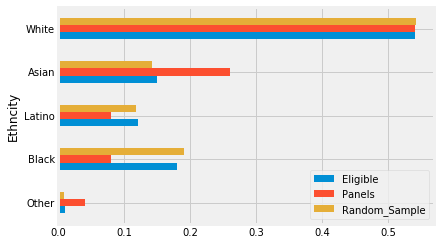

In [102]:
panels_and_sample[['Ethncity','Eligible','Panels', 'Random_Sample']].sort_values('Panels', ascending=True).plot.barh(0)
plots.show()

In [105]:
# distance 
total_variation_distance(panels_and_sample.Random_Sample, panels_and_sample.Eligible)

0.012278045423262166

In [106]:
total_variation_distance(jury.Panels, jury.Eligible)

0.14

Since the `Random_Sample` varies randomly, we need to compute the distribution for all possible values and compute total_variation_distance with the observation

In [108]:
# Total variation distance distribution for 10000 samples
tvds = make_array()
repetitions = 10000
for i in range(repetitions):
    sample_distribution = sample_proportions(1453, eligible_population)
    new_tvd = total_variation_distance(sample_distribution, eligible_population)
    tvds = np.append(tvds,new_tvd)

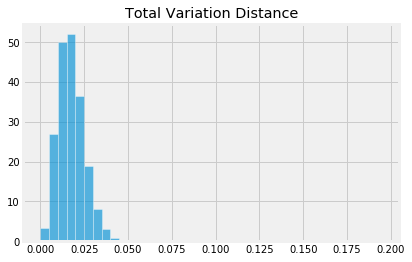

In [110]:
# Create histogram of estimates
# Empirical distribution of statistics by simulation
pd.DataFrame(tvds, 
             columns=['Total Variation Distance']).hist(
    bins=np.arange(0,0.2,0.005),
                                                              edgecolor='white', 
                                                    alpha=0.65,normed=True)
plots.show()

Conclusion:

The actual and simulated distribution have show differnce in TVD. 

Had the Panel were selected at random, 0.14 should be within the didtribution of the prediction by random selection. 

*Note: This notebook is based on the Berkeley's Data Science course on EdX. More reference can be found [here](https://www.inferentialthinking.com/)*